In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import sklearn.metrics as metrics
from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest
import random
from sklearn.feature_selection import SequentialFeatureSelector #Para stepwise
from sklearn.linear_model import RidgeCV, Ridge #Para Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

from scipy.stats import shapiro

import sklearn.cluster as cluster
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import scale
import sklearn.preprocessing
# import pyclustertend 
import scipy.stats as stats
import scipy.cluster.hierarchy as sch

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')
random.seed(123)

In [7]:
houses_df = pd.read_csv('train.csv', encoding='latin1')

houses_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [8]:
houses_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Obtenemos la variables numéricas

In [10]:
numeric_columns = houses_df.select_dtypes(include=['int64'])
print(numeric_columns.columns.values)

['Id' 'MSSubClass' 'LotArea' 'OverallQual' 'OverallCond' 'YearBuilt'
 'YearRemodAdd' 'BsmtFinSF1' 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF'
 '1stFlrSF' '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath'
 'BsmtHalfBath' 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr'
 'TotRmsAbvGrd' 'Fireplaces' 'GarageCars' 'GarageArea' 'WoodDeckSF'
 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch' 'ScreenPorch' 'PoolArea'
 'MiscVal' 'MoSold' 'YrSold' 'SalePrice']


Contamos la cantidad de campos numéricos

In [11]:
# Eliminamos Id, porque no tiene relevancia la columna de identificador único
numeric_columns.pop('Id')

num_int64_columns = len(numeric_columns.columns.values)

num_int64_columns

34

In [12]:
numeric_columns = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
 '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

numeric = houses_df[numeric_columns]
numeric

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,366,0,112,0,0,0,0,4,2010,142125


Contamos la cantidad de nulls que hay por campo

In [13]:
null_counts = numeric.isnull().sum()
null_counts[null_counts > 0].count()

# Con el resultado podemos ver que ninguna columna tiene valores nulos

0

Obtenemos los campos que poseen 0s en sus filas

In [14]:
zero_counts = (numeric == 0).sum()
zero_counts[zero_counts > 0]

BsmtFinSF1        467
BsmtFinSF2       1293
BsmtUnfSF         118
TotalBsmtSF        37
2ndFlrSF          829
LowQualFinSF     1434
BsmtFullBath      856
BsmtHalfBath     1378
FullBath            9
HalfBath          913
BedroomAbvGr        6
KitchenAbvGr        1
Fireplaces        690
GarageCars         81
GarageArea         81
WoodDeckSF        761
OpenPorchSF       656
EnclosedPorch    1252
3SsnPorch        1436
ScreenPorch      1344
PoolArea         1453
MiscVal          1408
dtype: int64

In [15]:
zero_counts[zero_counts > 650].count()

14

Tenemos 22, de nuestras 34 variables, con por lo menos un número 0

In [16]:
zero_counts[zero_counts > 650]

BsmtFinSF2       1293
2ndFlrSF          829
LowQualFinSF     1434
BsmtFullBath      856
BsmtHalfBath     1378
HalfBath          913
Fireplaces        690
WoodDeckSF        761
OpenPorchSF       656
EnclosedPorch    1252
3SsnPorch        1436
ScreenPorch      1344
PoolArea         1453
MiscVal          1408
dtype: int64

Eliminamos las columnas del data frame que poseen demasiados 0s

In [17]:
numeric = numeric.drop(['BsmtFinSF2', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 
            'HalfBath', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch', 
            'PoolArea', 'MiscVal'], axis=1)

Extraemos las tablas con valores 0 y los reemplazamos

No los vamos a rellenar, ya que, dichas cantidades nos decriben si cuanto de que campo posee la casa, en caso 0 si no posee. Por lo que los valores no son significativamente altos para que los 0 afecten en gran manera nuestro análisis.

In [18]:
# variables = ["BsmtFinSF1", "BsmtUnfSF", "TotalBsmtSF", "FullBath", "BedroomAbvGr", "KitchenAbvGr", "GarageCars", 
#             "GarageArea", 'BsmtFinSF2', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 
#             'HalfBath', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch', 
#             'PoolArea', 'MiscVal']

# for var in variables:
#     median_value = numeric[numeric[var] != 0][var].median()
#     numeric[var].replace(0, median_value, inplace=True)

Verificamos que se hayan cambiado los 0

In [19]:
zero_counts = (numeric == 0).sum()
zero_counts[zero_counts > 0]

BsmtFinSF1      467
BsmtUnfSF       118
TotalBsmtSF      37
FullBath          9
BedroomAbvGr      6
KitchenAbvGr      1
GarageCars       81
GarageArea       81
dtype: int64

Determinamos cuales campos tienen una distribución normal

In [20]:
# Assuming df is your DataFrame

alpha = 0.05
normal_counter = 0
not_normal_counter = 0

for column in numeric.columns:
    stat, p = shapiro(numeric[column])
    if p > alpha:
        normal_counter += 1
    else:
        not_normal_counter += 1

print(f'Cantidad de variables distribuidas normalmente: {normal_counter}')
print(f'Cantidad de variables sin distribución normal : {not_normal_counter}')

Cantidad de variables distribuidas normalmente: 0
Cantidad de variables sin distribución normal : 20


Como se puede apreciar ninguna de las variables parece seguir una distribución normal

In [21]:
numeric.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,567.240411,1057.429452,1162.626712,1515.463699,1.565068,2.866438,1.046575,6.517808,1.767123,472.980137,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,441.866955,438.705324,386.587738,525.480383,0.550916,0.815778,0.220338,1.625393,0.747315,213.804841,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,334.000000,334.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,223.000000,795.750000,882.000000,1129.500000,1.000000,2.000000,1.000000,5.000000,1.000000,334.500000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,477.500000,991.500000,1087.000000,1464.000000,2.000000,3.000000,1.000000,6.000000,2.000000,480.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,808.000000,1298.250000,1391.250000,1776.750000,2.000000,3.000000,1.000000,7.000000,2.000000,576.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,2336.000000,6110.000000,4692.000000,5642.000000,3.000000,8.000000,3.000000,14.000000,4.000000,1418.000000,12.000000,2010.000000,755000.000000


Verificamos si algún campo posee valores atípicos

<Axes: >

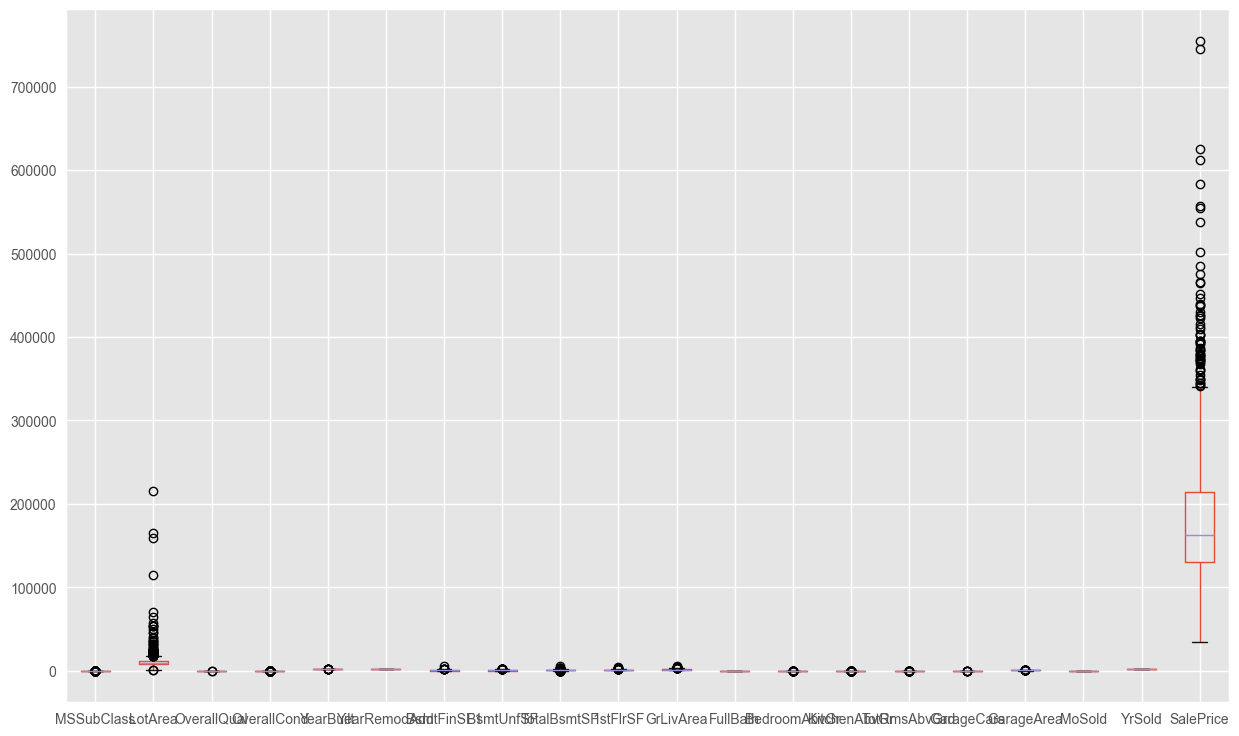

In [22]:
numeric.boxplot()

<Axes: >

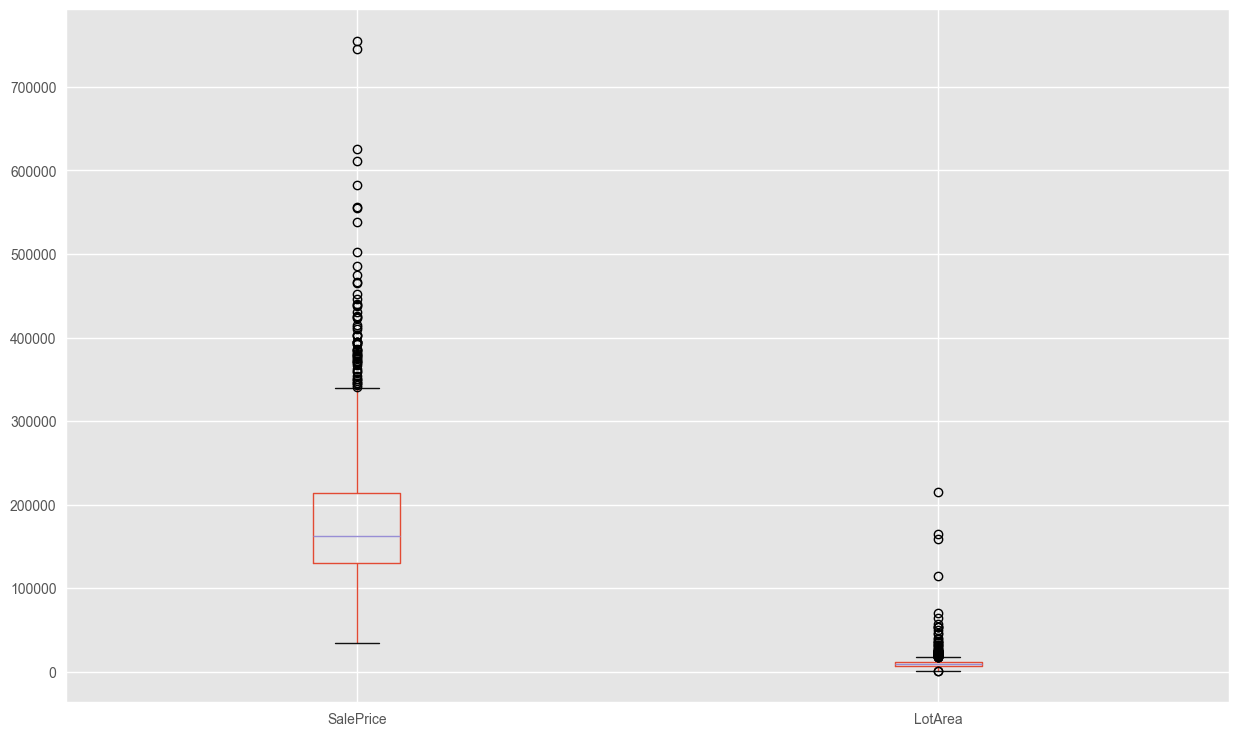

In [23]:
numeric[["SalePrice", "LotArea"]].boxplot()

Al examinar los campos por valores atípicos, podemos ver que los únicos campos con dichos valores son LotArea y SalePrice, lo que significa que hay casas con tamaños muy grandes y precios bastante elevados comparados con la mediana general. 

En SalePrice podemos ver que tenemos dos precios demasiado altos comparados con el resto de datos, también podemos ver que en LotArea tenemos casa que sobre pasan los 100,000 mts, por lo que son casa demasiado grandes y pueden arruinar nuestro análisis. Por ello eliminamos los datos atípicos.

In [24]:
numeric = numeric[numeric["SalePrice"] < 700000]
numeric = numeric[numeric["LotArea"] < 100000]

In [25]:
# g = sns.PairGrid(numeric)
# g.map_diag(sns.histplot)
# g.map_offdiag(sns.scatterplot)
# g.add_legend()

Error in callback <function flush_figures at 0x119828f40> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

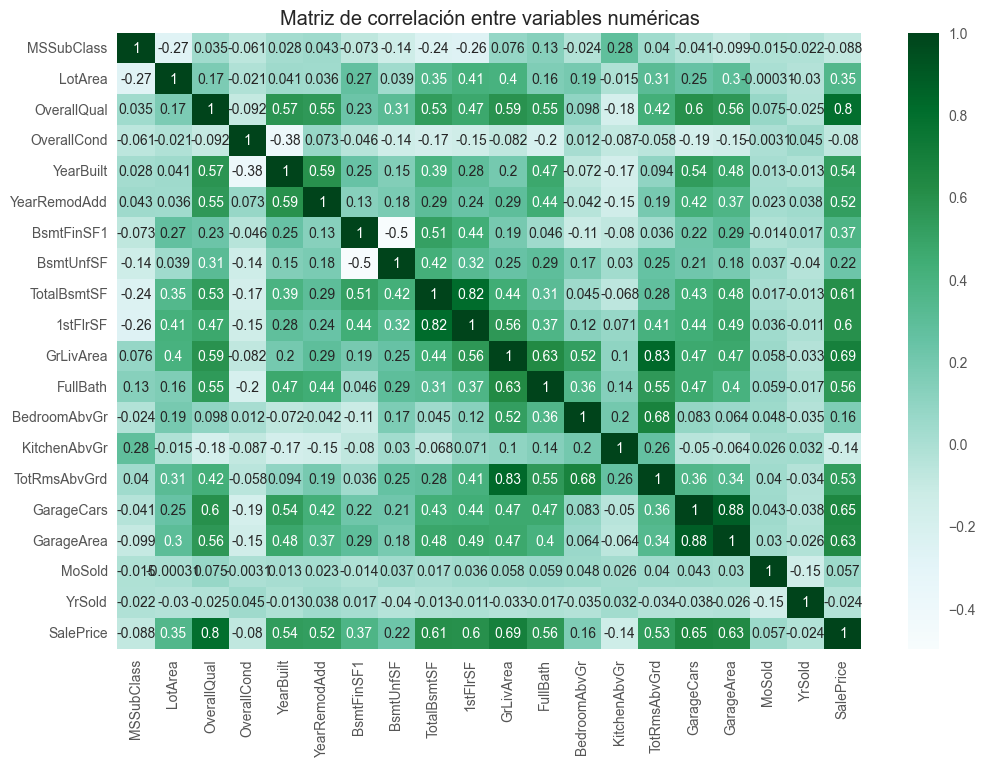

In [29]:
correlation_matrix = numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuGn')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

Correlación entre el presupuesto y los ingresos: 0.8158118489978974


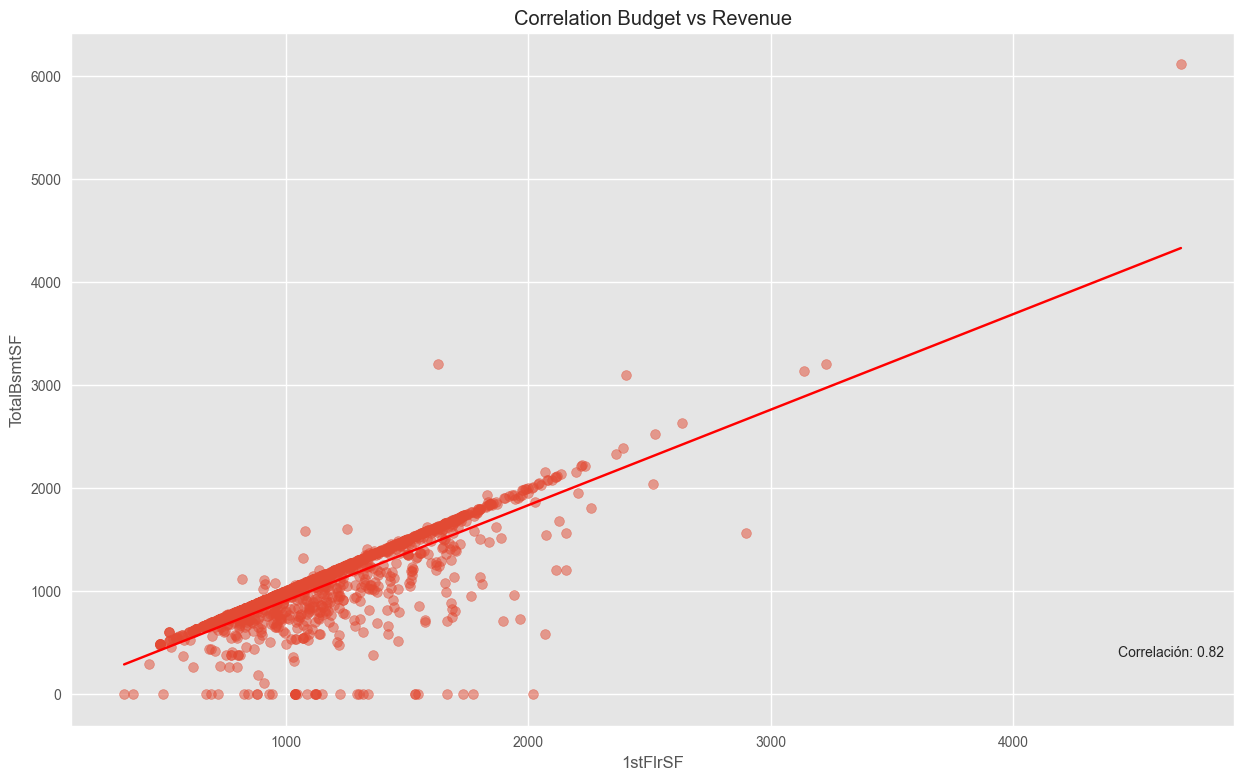

In [23]:
correlacion = numeric['1stFlrSF'].corr(numeric['TotalBsmtSF'])
print("Correlación entre el presupuesto y los ingresos:", correlacion)

# Calcular la correlación entre la cantidad de actores y los ingresos de las películas
correlacion = numeric['1stFlrSF'].corr(numeric['TotalBsmtSF'])

# Calculate the line of best fit
slope, intercept = np.polyfit(numeric["1stFlrSF"], numeric["TotalBsmtSF"], 1)

# Generate x values
x_values = np.linspace(numeric["1stFlrSF"].min(), numeric["1stFlrSF"].max(), 100)

# Calculate corresponding y values
y_values = slope * x_values + intercept

# Plot the scatter plot
plt.scatter(numeric["1stFlrSF"], numeric["TotalBsmtSF"], alpha=0.5)
plt.plot(x_values, y_values, color='red')  # Plot the line of best fit
plt.text(0.9, 0.1, f"Correlación: {correlacion:.2f}", transform=plt.gca().transAxes)

plt.title('Correlation Budget vs Revenue')
plt.xlabel('1stFlrSF')
plt.ylabel('TotalBsmtSF')
plt.show()

Correlación entre el presupuesto y los ingresos: 0.8300622671670174


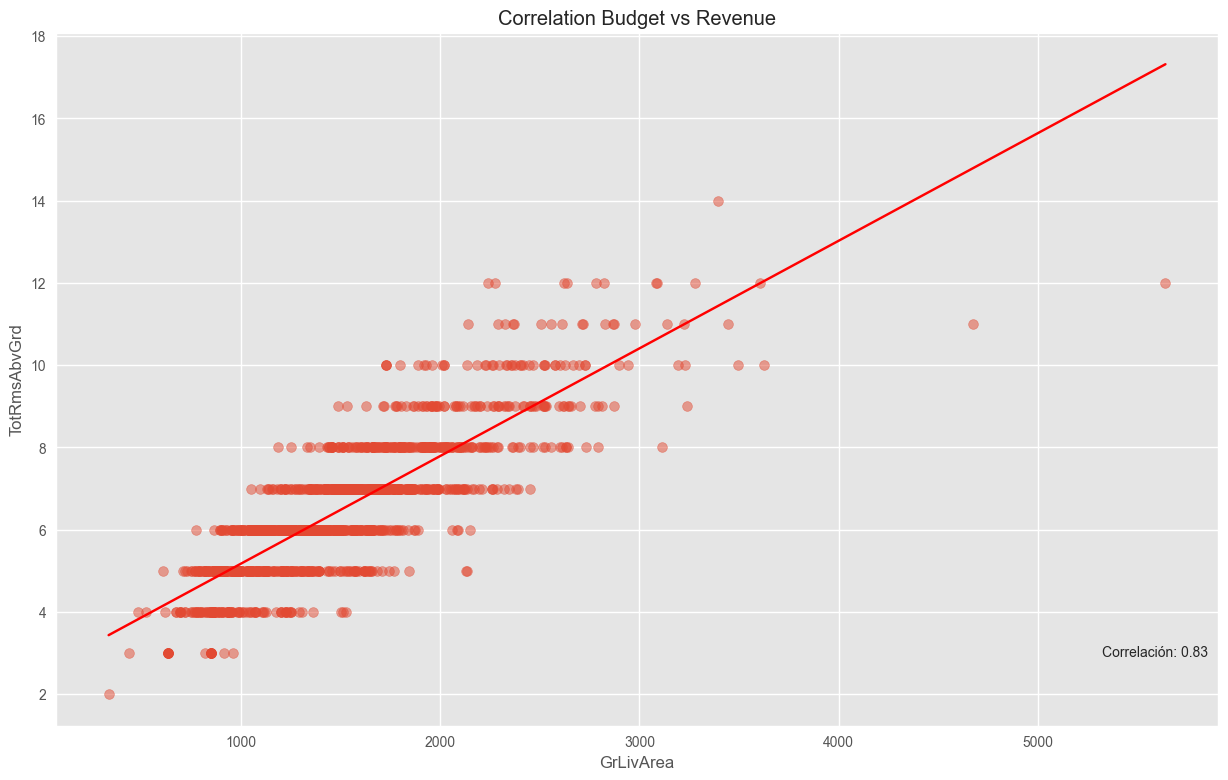

In [24]:
correlacion = numeric['GrLivArea'].corr(numeric['TotRmsAbvGrd'])
print("Correlación entre el presupuesto y los ingresos:", correlacion)

# Calcular la correlación entre la cantidad de actores y los ingresos de las películas
correlacion = numeric['GrLivArea'].corr(numeric['TotRmsAbvGrd'])

# Calculate the line of best fit
slope, intercept = np.polyfit(numeric["GrLivArea"], numeric["TotRmsAbvGrd"], 1)

# Generate x values
x_values = np.linspace(numeric["GrLivArea"].min(), numeric["GrLivArea"].max(), 100)

# Calculate corresponding y values
y_values = slope * x_values + intercept

# Plot the scatter plot
plt.scatter(numeric["GrLivArea"], numeric["TotRmsAbvGrd"], alpha=0.5)
plt.plot(x_values, y_values, color='red')  # Plot the line of best fit
plt.text(0.9, 0.1, f"Correlación: {correlacion:.2f}", transform=plt.gca().transAxes)

plt.title('Correlation Budget vs Revenue')
plt.xlabel('GrLivArea')
plt.ylabel('TotRmsAbvGrd')
plt.show()

Correlación entre el presupuesto y los ingresos: 0.8824268554604614


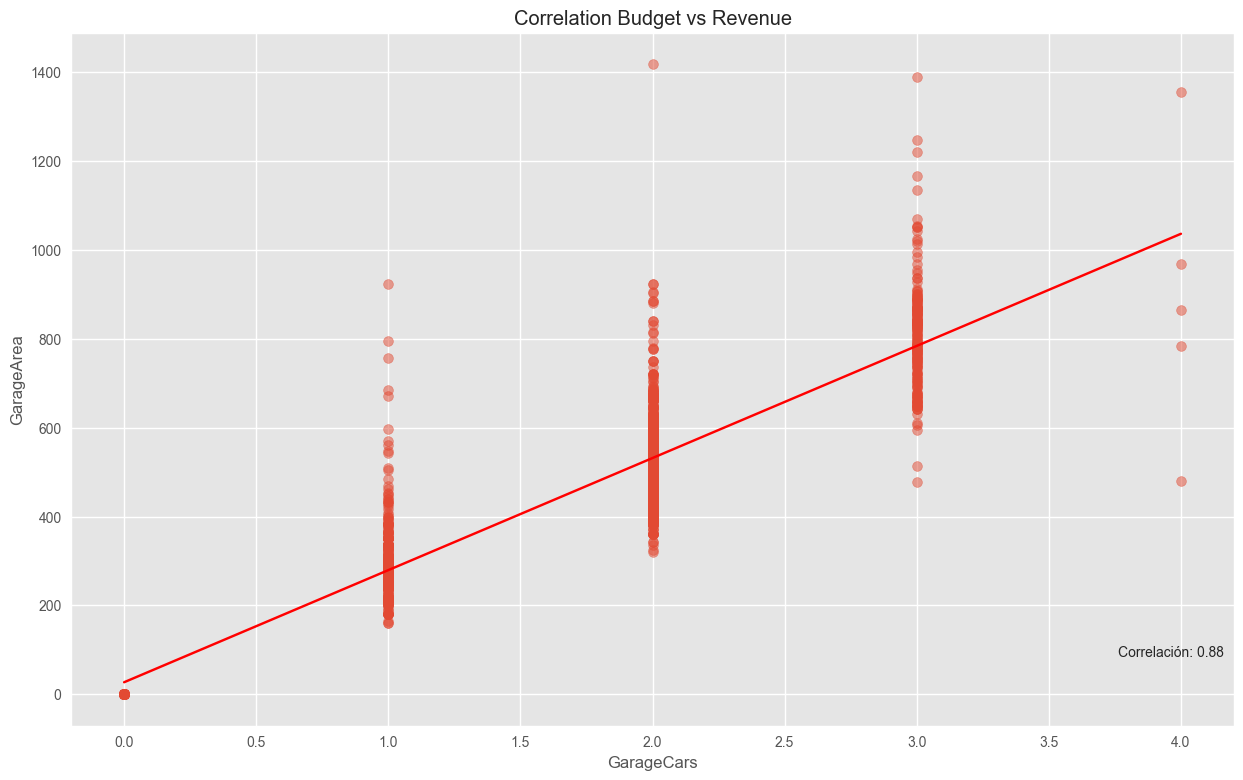

In [25]:
correlacion = numeric['GarageCars'].corr(numeric['GarageArea'])
print("Correlación entre el presupuesto y los ingresos:", correlacion)

# Calcular la correlación entre la cantidad de actores y los ingresos de las películas
correlacion = numeric['GarageCars'].corr(numeric['GarageArea'])

# Calculate the line of best fit
slope, intercept = np.polyfit(numeric["GarageCars"], numeric["GarageArea"], 1)

# Generate x values
x_values = np.linspace(numeric["GarageCars"].min(), numeric["GarageCars"].max(), 100)

# Calculate corresponding y values
y_values = slope * x_values + intercept

# Plot the scatter plot
plt.scatter(numeric["GarageCars"], numeric["GarageArea"], alpha=0.5)
plt.plot(x_values, y_values, color='red')  # Plot the line of best fit
plt.text(0.9, 0.1, f"Correlación: {correlacion:.2f}", transform=plt.gca().transAxes)

plt.title('Correlation Budget vs Revenue')
plt.xlabel('GarageCars')
plt.ylabel('GarageArea')
plt.show()

Correlación entre el presupuesto y los ingresos: 0.6756149701317874


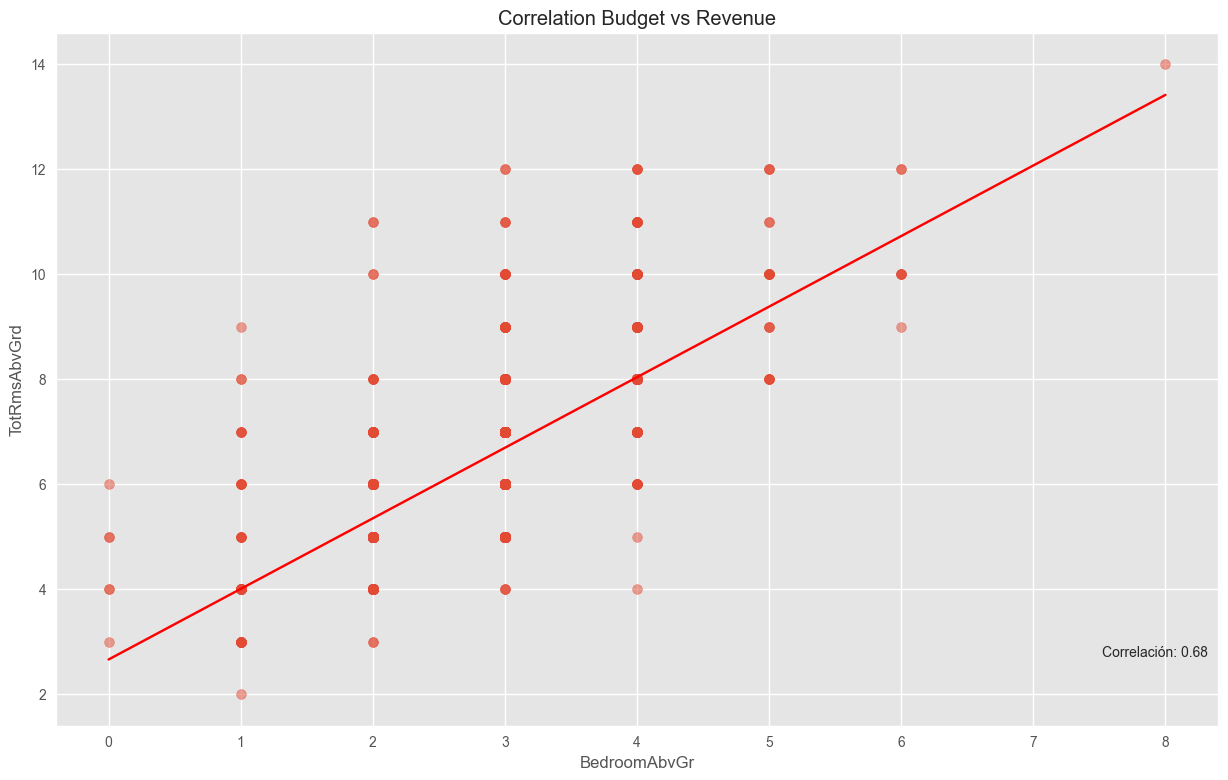

In [26]:
correlacion = numeric['BedroomAbvGr'].corr(numeric['TotRmsAbvGrd'])
print("Correlación entre el presupuesto y los ingresos:", correlacion)

# Calcular la correlación entre la cantidad de actores y los ingresos de las películas
correlacion = numeric['BedroomAbvGr'].corr(numeric['TotRmsAbvGrd'])

# Calculate the line of best fit
slope, intercept = np.polyfit(numeric["BedroomAbvGr"], numeric["TotRmsAbvGrd"], 1)

# Generate x values
x_values = np.linspace(numeric["BedroomAbvGr"].min(), numeric["BedroomAbvGr"].max(), 100)

# Calculate corresponding y values
y_values = slope * x_values + intercept

# Plot the scatter plot
plt.scatter(numeric["BedroomAbvGr"], numeric["TotRmsAbvGrd"], alpha=0.5)
plt.plot(x_values, y_values, color='red')  # Plot the line of best fit
plt.text(0.9, 0.1, f"Correlación: {correlacion:.2f}", transform=plt.gca().transAxes)

plt.title('Correlation Budget vs Revenue')
plt.xlabel('BedroomAbvGr')
plt.ylabel('TotRmsAbvGrd')
plt.show()

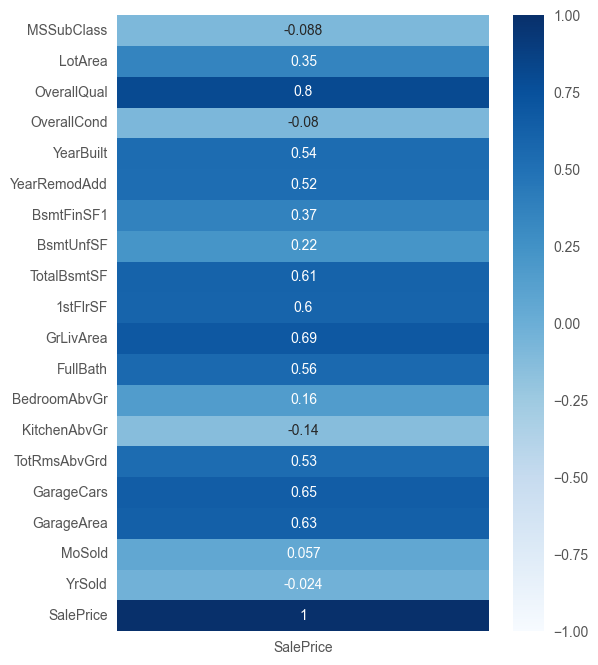

In [45]:
numeric_features = numeric

corr = numeric_features.corr()

selected_variable = corr['SalePrice']

plt.figure(figsize=(6, 8))  # Adjust the width and height as needed

#plot the heatmap
ax = sns.heatmap(selected_variable.to_frame(), annot=True, cmap='Blues', vmin=-1, vmax=1)

ax.set_facecolor('none')
plt.gcf().patch.set_facecolor('none')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(left=False, bottom=False)

plt.show()

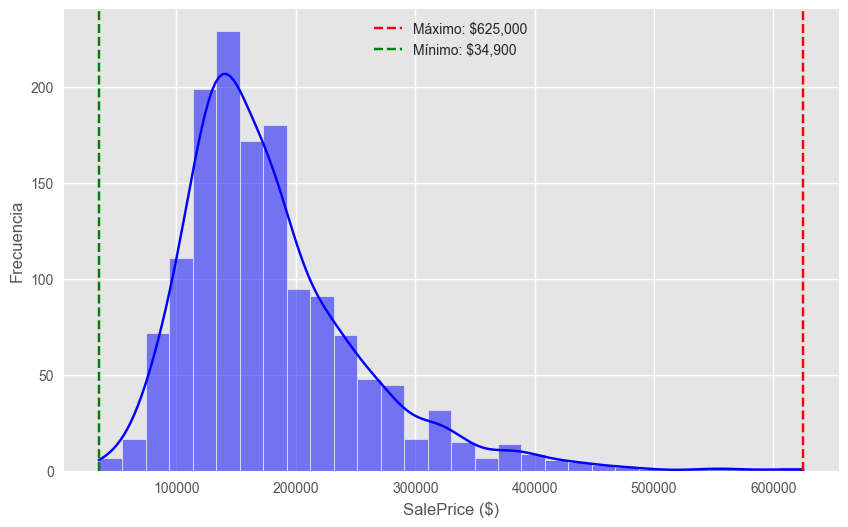

/var/folders/wx/3fwd1ycn21q0f_72nz8kjrr00000gn/T/ipykernel_73224/1748832920.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OverallQual', y='SalePrice', data=numeric, palette='viridis')


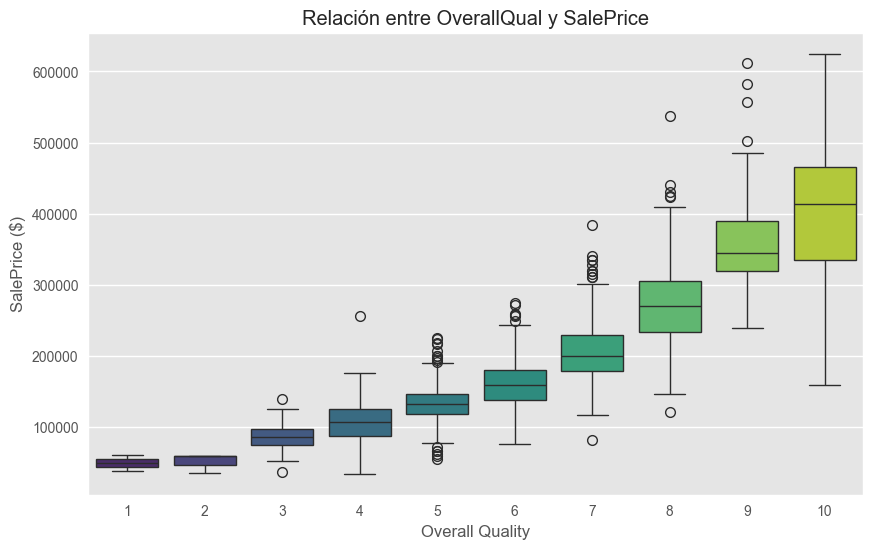

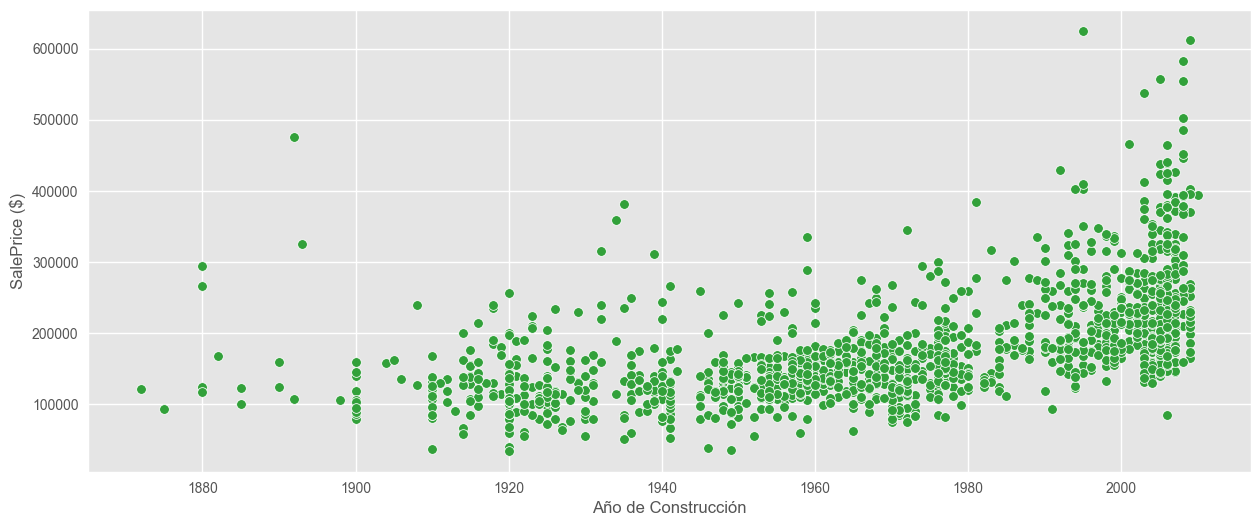

In [56]:
# Calcular el máximo y mínimo de SalePrice
max_sale_price = numeric['SalePrice'].max()
min_sale_price = numeric['SalePrice'].min()

# Graficar la distribución de la variable 'SalePrice' con líneas para el máximo y el mínimo
plt.figure(figsize=(10,6))
ax = sns.histplot(numeric['SalePrice'], kde=True, bins=30, color='blue')
plt.axvline(x=max_sale_price, color='red', linestyle='--', label=f'Máximo: ${max_sale_price:,}')
plt.axvline(x=min_sale_price, color='green', linestyle='--', label=f'Mínimo: ${min_sale_price:,}')
plt.xlabel('SalePrice ($)')
plt.ylabel('Frecuencia')
plt.legend()

plt.gcf().patch.set_facecolor('none')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(left=False, bottom=False)

plt.show()


# Graficar la relación entre 'OverallQual' y 'SalePrice'
plt.figure(figsize=(10,6))
sns.boxplot(x='OverallQual', y='SalePrice', data=numeric, palette='viridis')
plt.title('Relación entre OverallQual y SalePrice')
plt.xlabel('Overall Quality')
plt.ylabel('SalePrice ($)')
plt.show()



# Graficar la relación entre 'YearBuilt' y 'SalePrice'
plt.figure(figsize=(15,6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=numeric, color='#32A13A')
plt.xlabel('Año de Construcción')
plt.ylabel('SalePrice ($)')

plt.show()

In [29]:
def hopkins_statistic(X): 
  sample = scale(X)
  n,d = X.shape
  
  m = int(0.1 * n) # 10% de la muestra
  neighbours = NearestNeighbors(n_neighbors=1).fit(X)
  rand_sample = np.random.random_sample(size=(m, d)) * (sample.max(axis=0) - sample.min(axis=0)) + sample.min(axis=0)
    
  u_dist, _ = neighbours.kneighbors(rand_sample, return_distance=True)
  u_dist_sum = np.sum(u_dist)
    
  w_dist, _ = neighbours.kneighbors(sample[np.random.choice(n, m, replace=False), :], return_distance=True)
  w_dist_sum = np.sum(w_dist)
    
  H = u_dist_sum / (u_dist_sum + w_dist_sum)
  return H

print(hopkins_statistic(houses_df[['OverallQual', 'OverallCond','BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageCars', 'GarageArea', 'BedroomAbvGr', 'KitchenAbvGr']]))

numeric


0.7155684362438733


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,150,856,856,1710,2,3,1,8,2,548,2,2008,208500
1,20,9600,6,8,1976,1976,978,284,1262,1262,1262,2,3,1,6,2,460,5,2007,181500
2,60,11250,7,5,2001,2002,486,434,920,920,1786,2,3,1,6,2,608,9,2008,223500
3,70,9550,7,5,1915,1970,216,540,756,961,1717,1,3,1,7,3,642,2,2006,140000
4,60,14260,8,5,2000,2000,655,490,1145,1145,2198,2,4,1,9,3,836,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,953,953,953,1647,2,3,1,7,2,460,8,2007,175000
1456,20,13175,6,6,1978,1988,790,589,1542,2073,2073,2,3,1,7,2,500,2,2010,210000
1457,70,9042,7,9,1941,2006,275,877,1152,1188,2340,2,4,1,9,1,252,5,2010,266500
1458,20,9717,5,6,1950,1996,49,0,1078,1078,1078,1,2,1,5,1,240,4,2010,142125


In [30]:
# selected_columns = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SalePrice']

selected_columns = ['OverallQual', 'OverallCond','BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageCars', 'GarageArea', 'BedroomAbvGr', 'KitchenAbvGr']

numeric_means = np.array(houses_df[selected_columns])

In [31]:
numeric_means_scaled = scale(numeric_means)

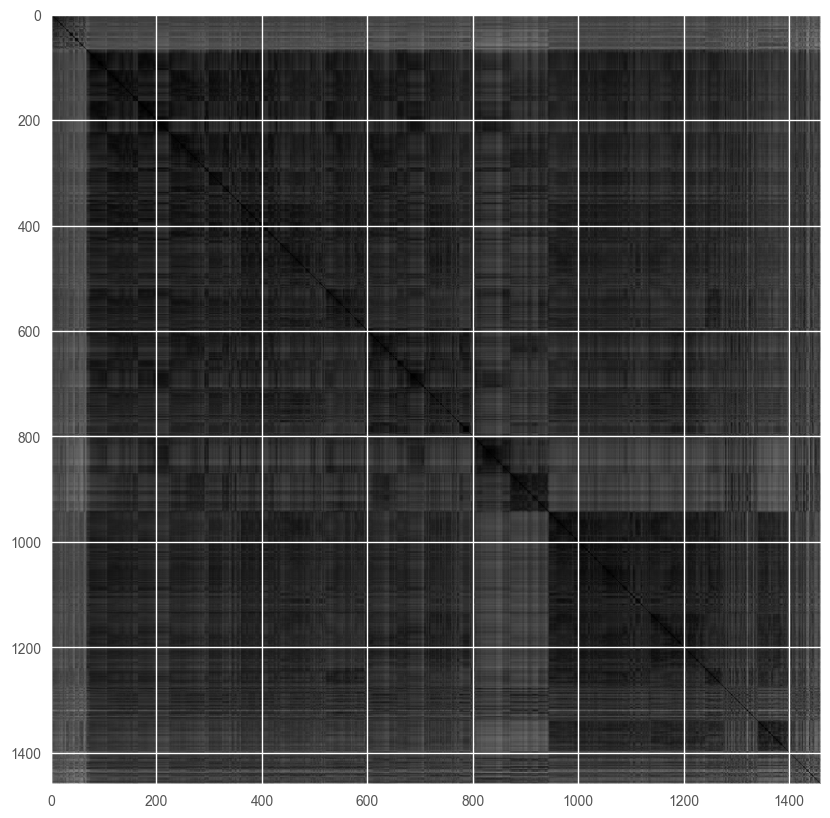

In [32]:
pyclustertend.vat(numeric_means_scaled)

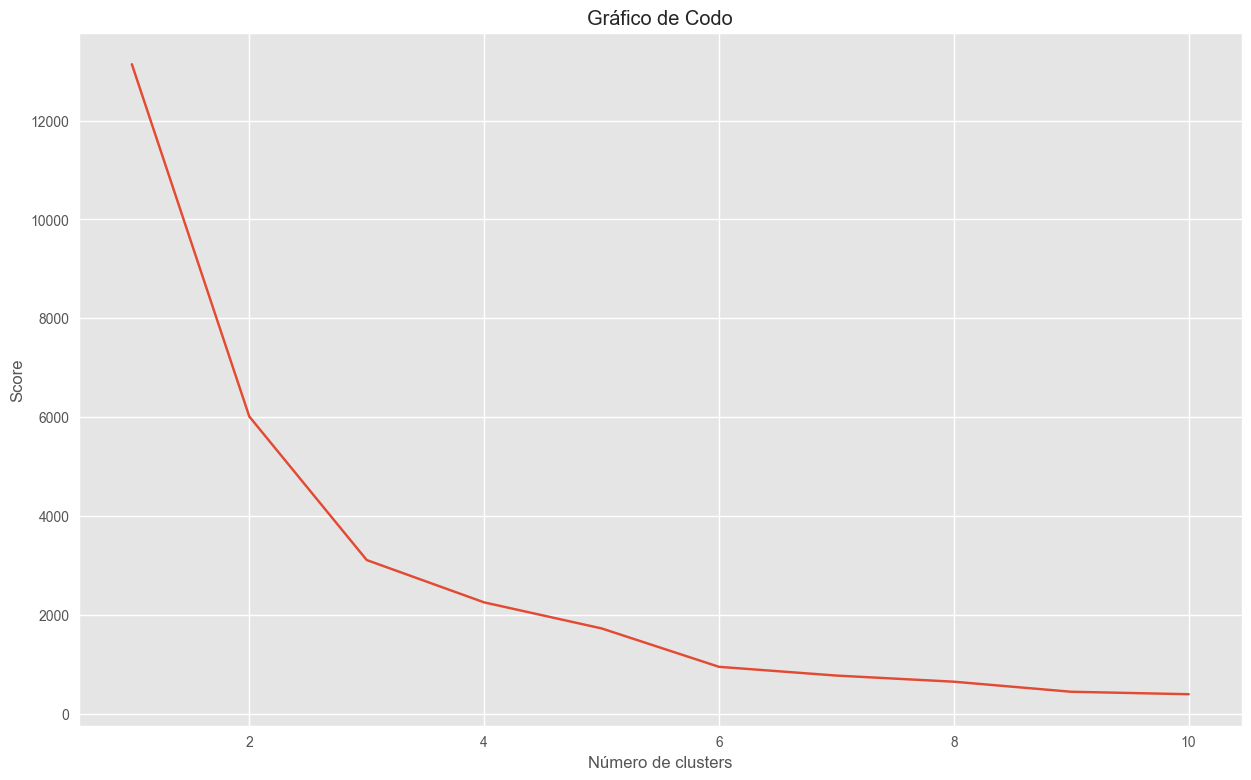

In [33]:
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(numeric_means_scaled.reshape(-1, 1))
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")

plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.35208505240413696
For n_clusters = 3 The average silhouette_score is : 0.3508776466614515
For n_clusters = 4 The average silhouette_score is : 0.3529138251267975
For n_clusters = 5 The average silhouette_score is : 0.30854224502952865
For n_clusters = 6 The average silhouette_score is : 0.3376159750829289


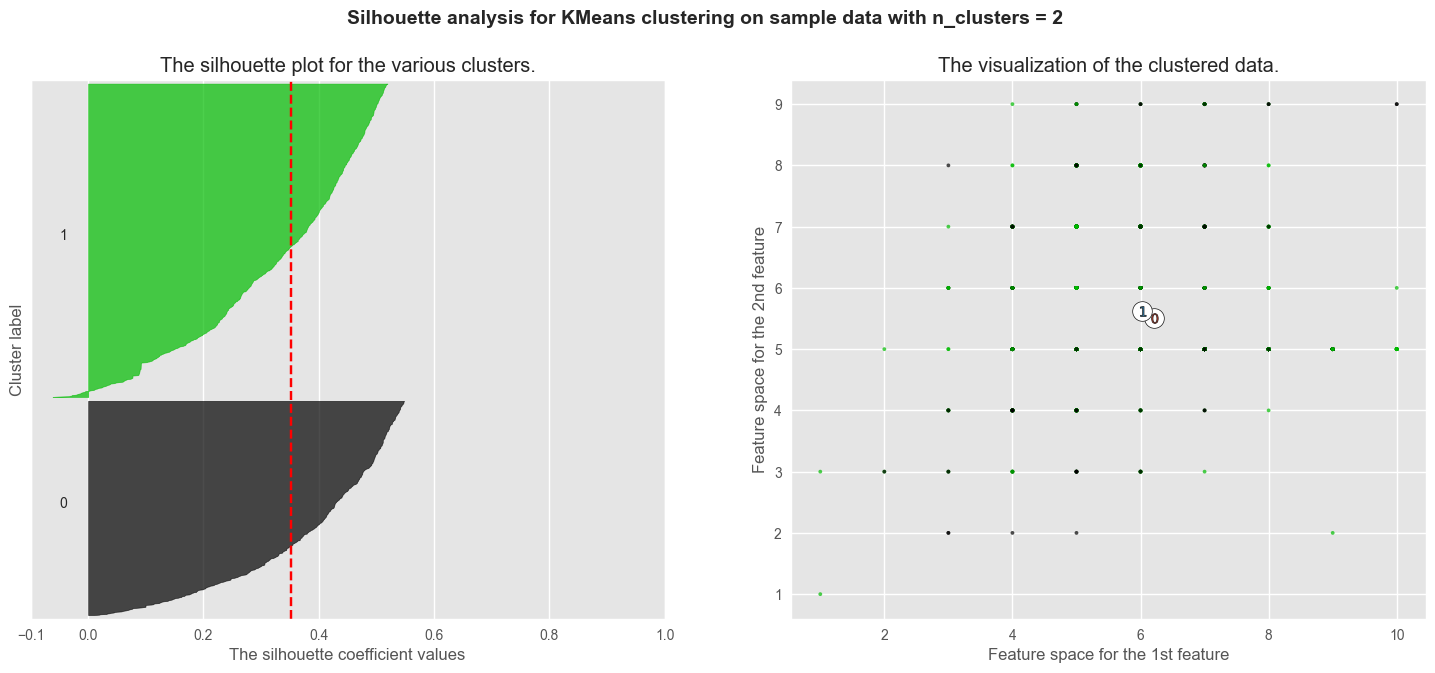

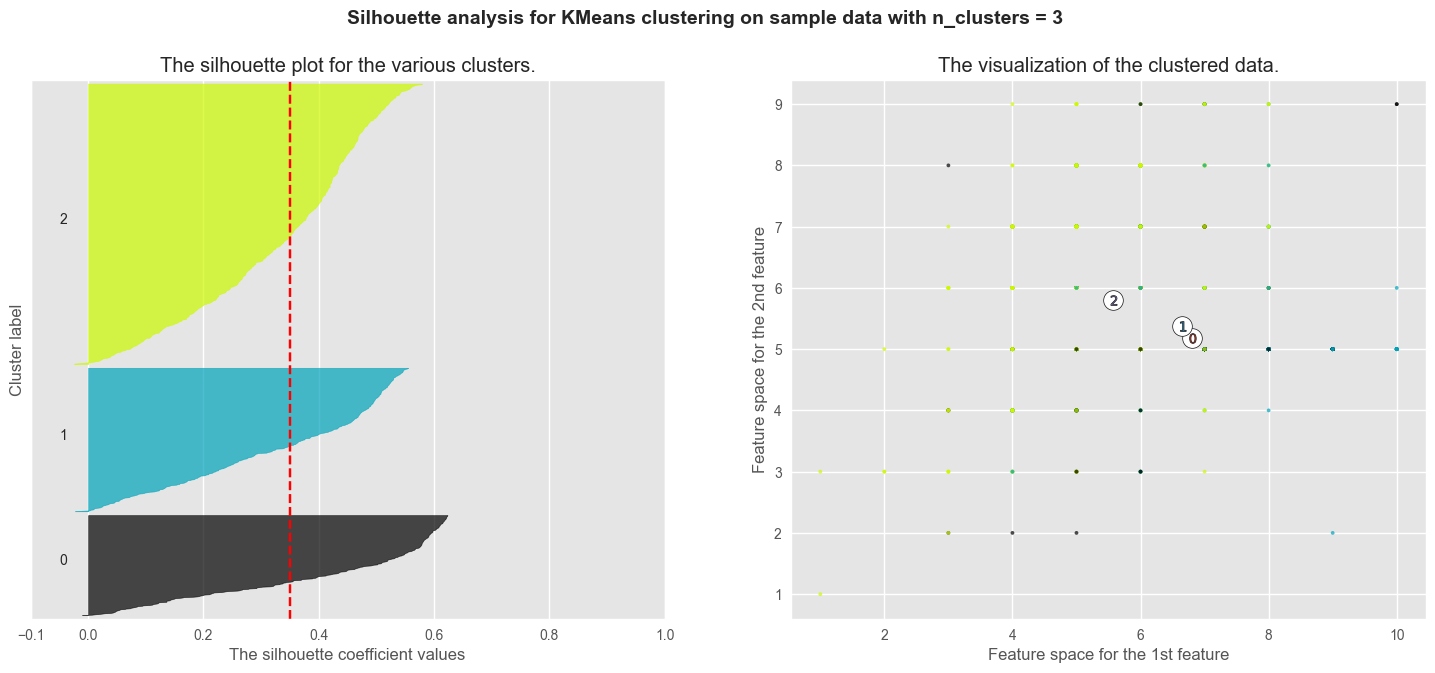

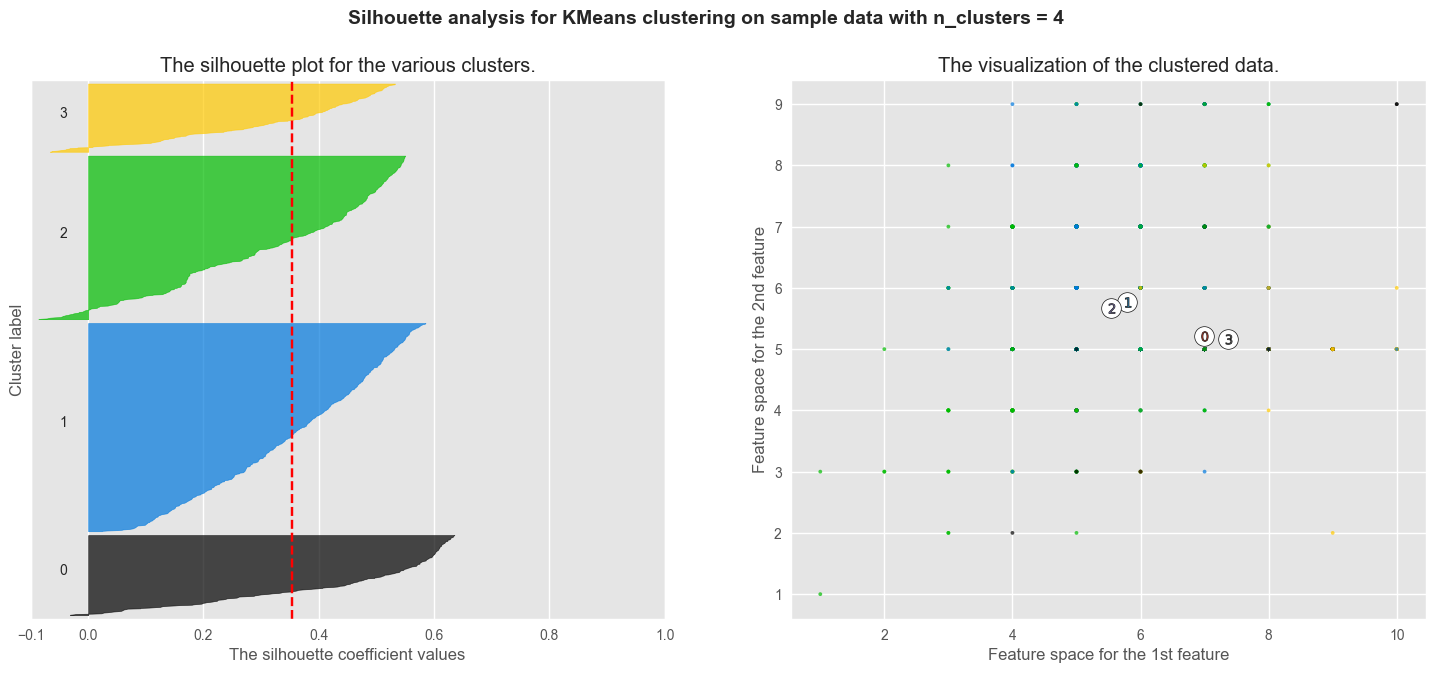

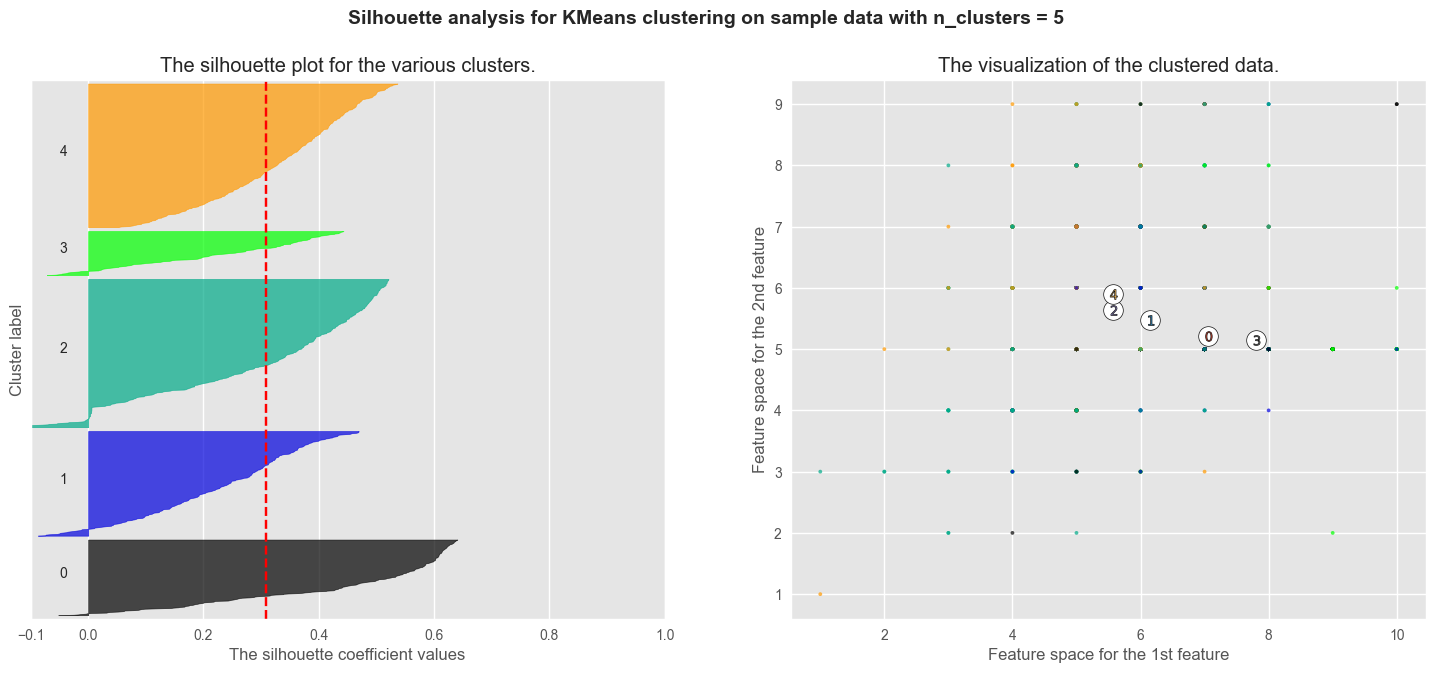

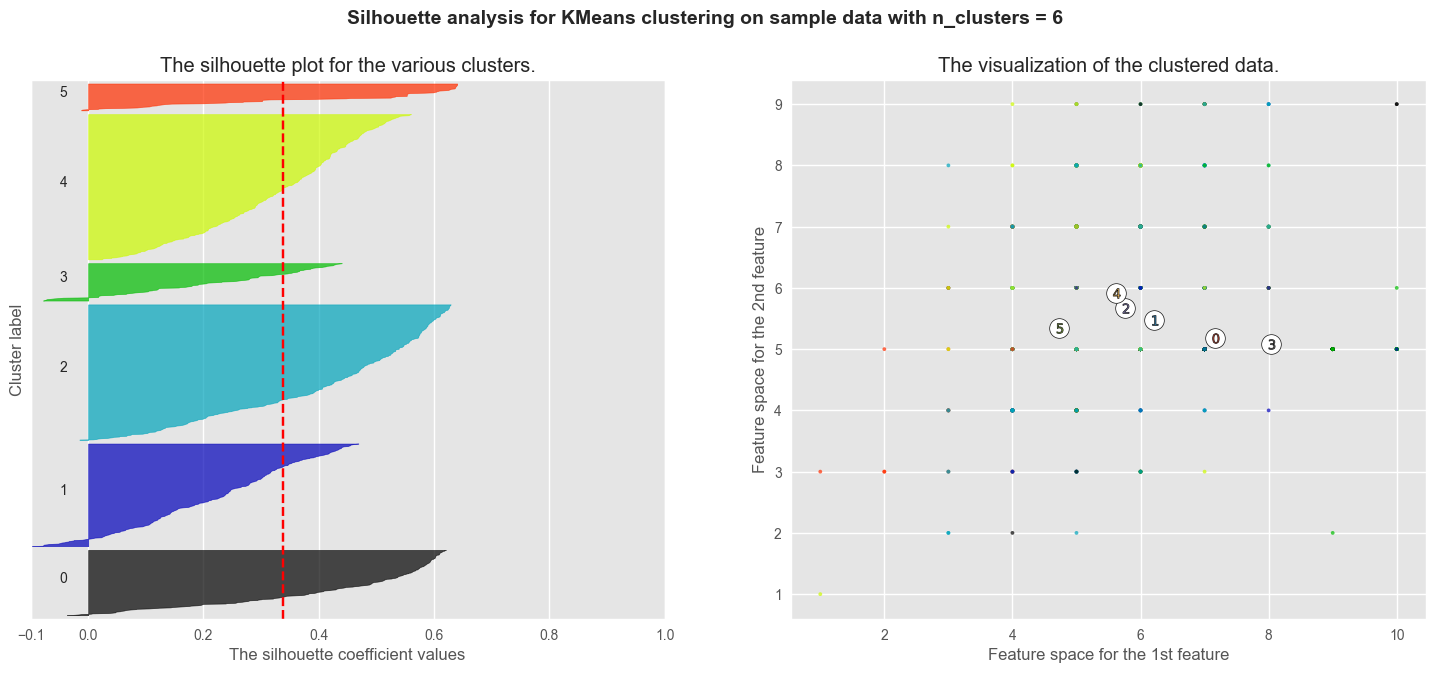

In [34]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(numeric_means) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(numeric_means)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(numeric_means, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(numeric_means, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        numeric_means[:, 0], numeric_means[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [35]:
km = cluster.KMeans(n_clusters=3, max_iter=3000).fit(numeric_means)
print(km)

KMeans(max_iter=3000, n_clusters=3)


In [36]:
centroides = km.cluster_centers_

centroids_df = pd.DataFrame(centroides, columns=selected_columns)

In [37]:
field = km.predict(numeric_means)

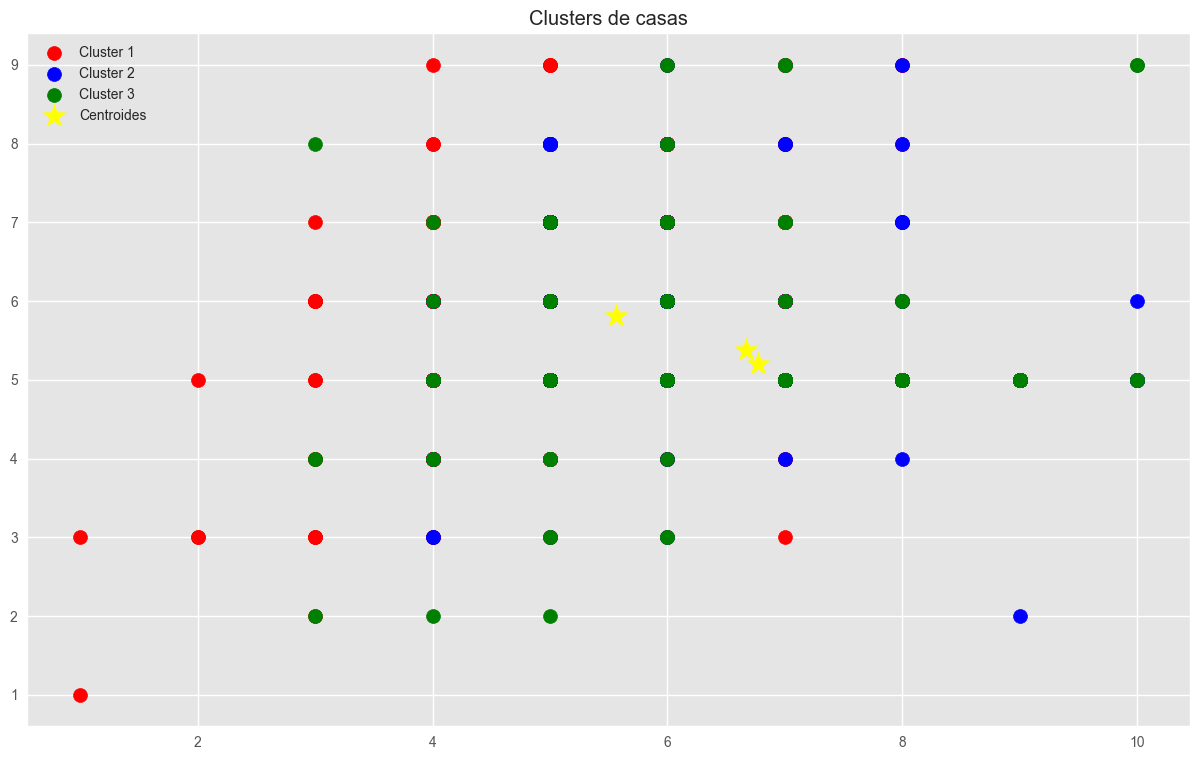

In [38]:
plt.scatter(numeric_means[field == 0, 0], numeric_means[field == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(numeric_means[field == 1, 0], numeric_means[field == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(numeric_means[field == 2, 0], numeric_means[field == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=300, c="yellow", marker="*", label="Centroides")
plt.title("Clusters de casas")
plt.legend()

(1460, 9)


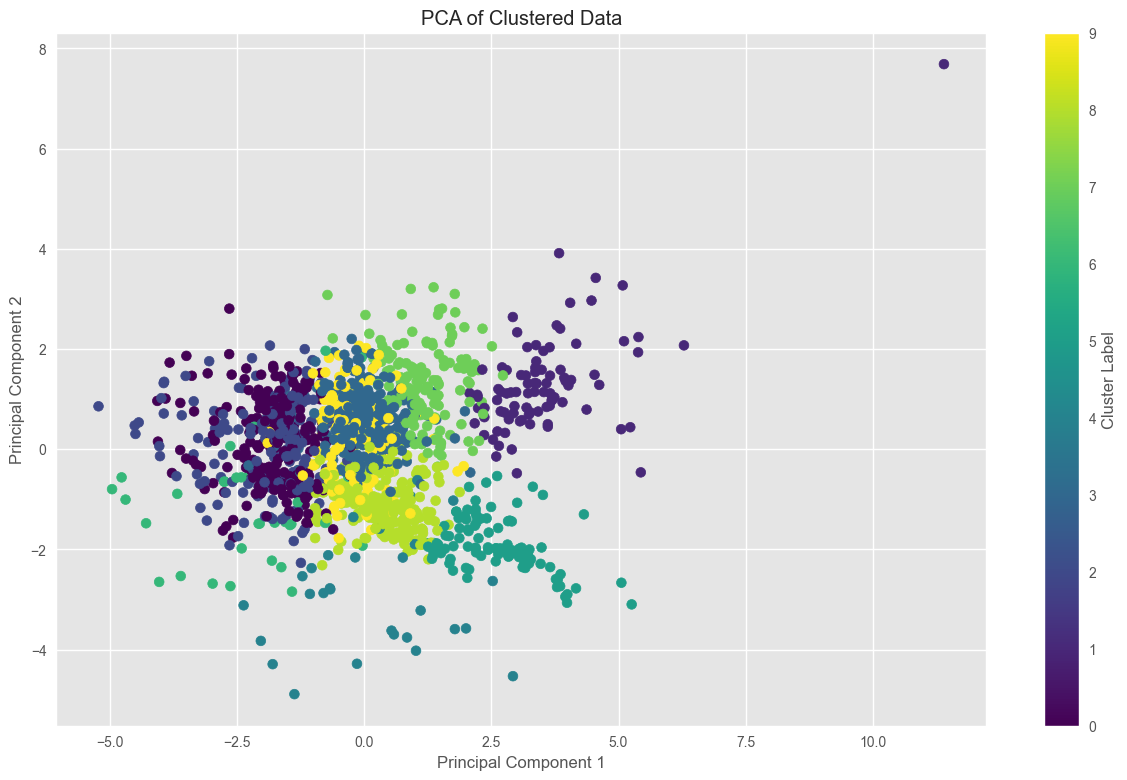

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
print(numeric_means_scaled.shape)
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(numeric_means_scaled)
cluster_labels = kmeans.fit_predict(numeric_means_scaled)

# Now X_pca can be plotted
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Clustered Data')
plt.colorbar(label='Cluster Label')
plt.show()

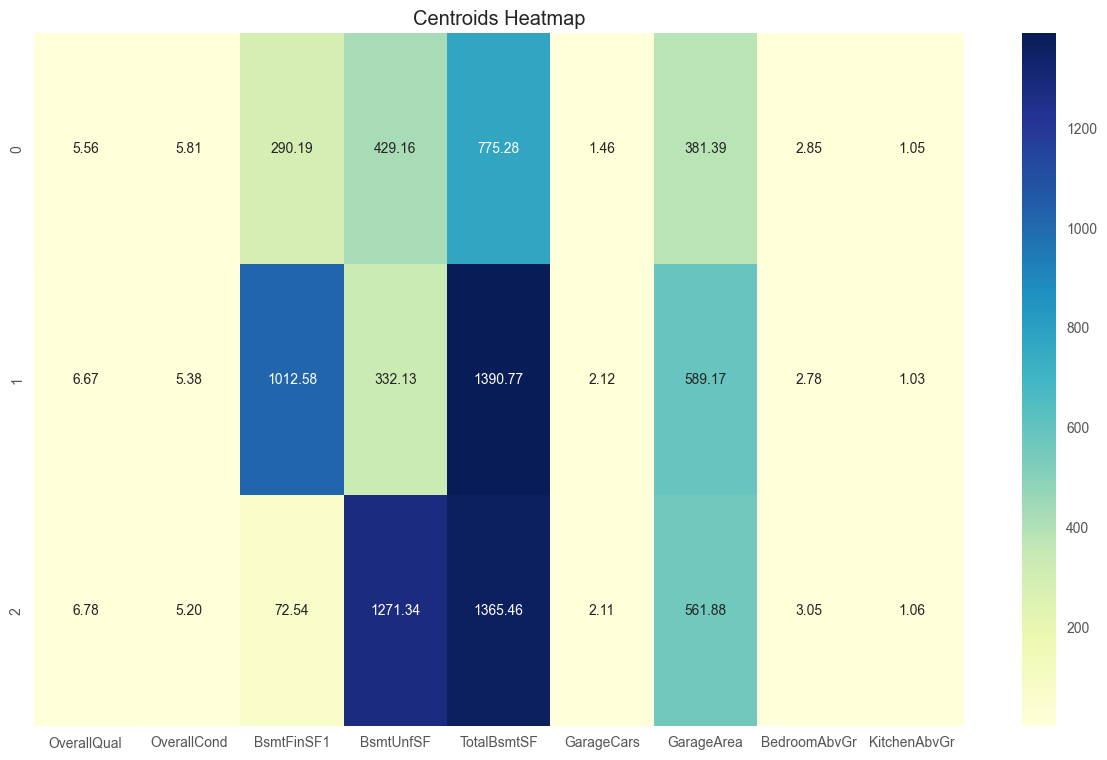

In [40]:
import seaborn as sns


# Assuming centroids_df is a DataFrame of your cluster centroids
sns.heatmap(centroids_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Centroids Heatmap")
plt.show()

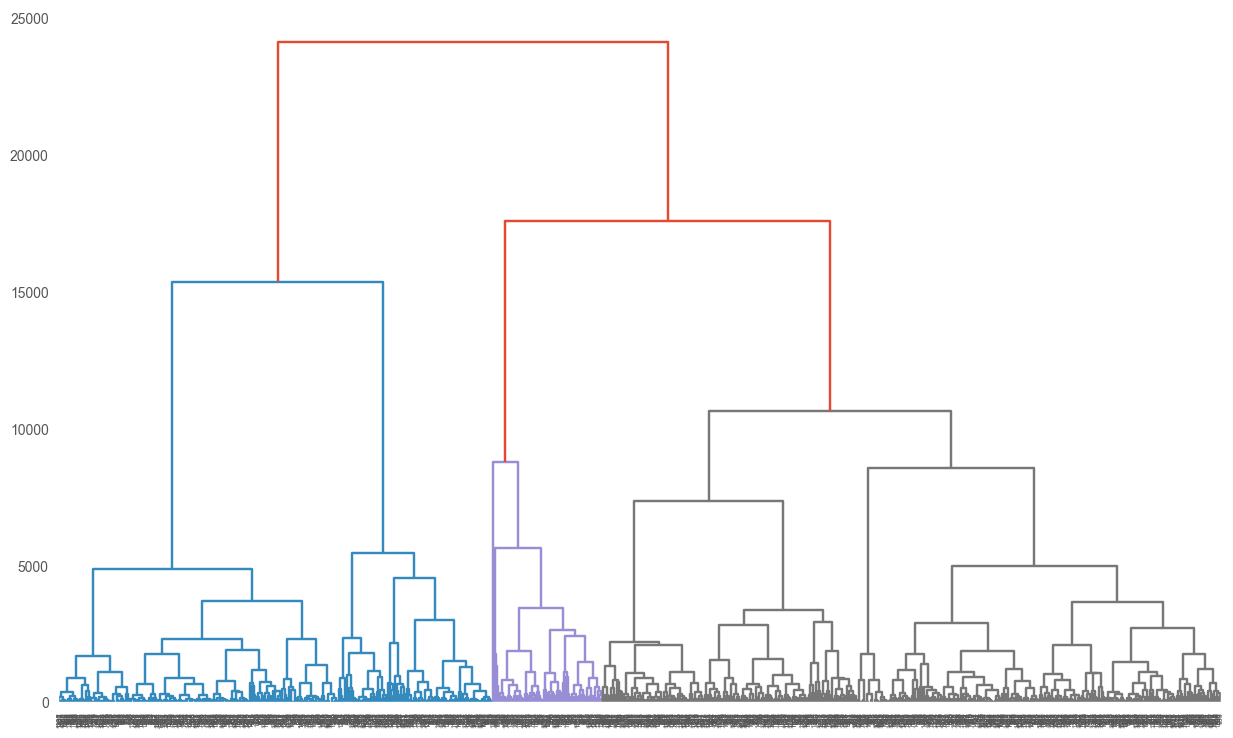

In [41]:
dendograma = sch.dendrogram(sch.linkage(numeric_means, method='ward'))

In [42]:
hc = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward')
numericHC = hc.fit_predict(numeric_means)
numericHC

array([1, 1, 1, ..., 1, 1, 1])

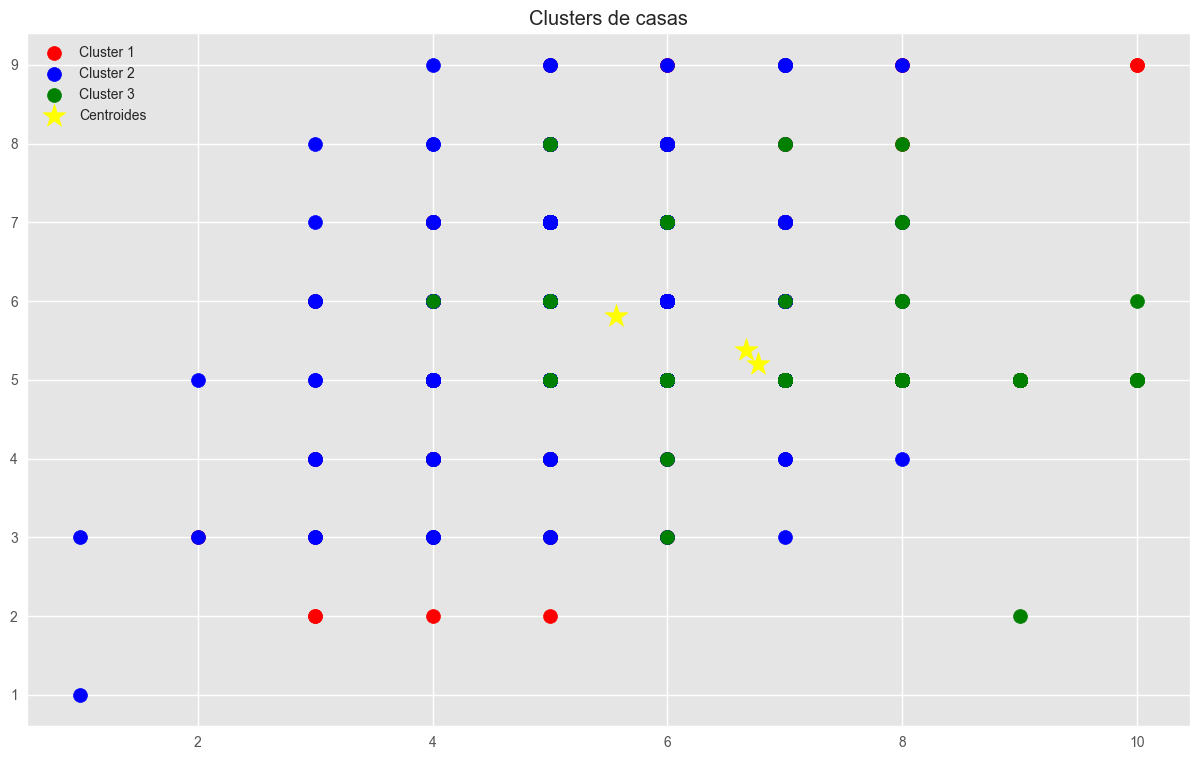

In [43]:
plt.scatter(numeric_means[numericHC == 0, 0], numeric_means[numericHC == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(numeric_means[numericHC == 1, 0], numeric_means[numericHC == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(numeric_means[numericHC == 2, 0], numeric_means[numericHC == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.title("Clusters de casas")
plt.legend()

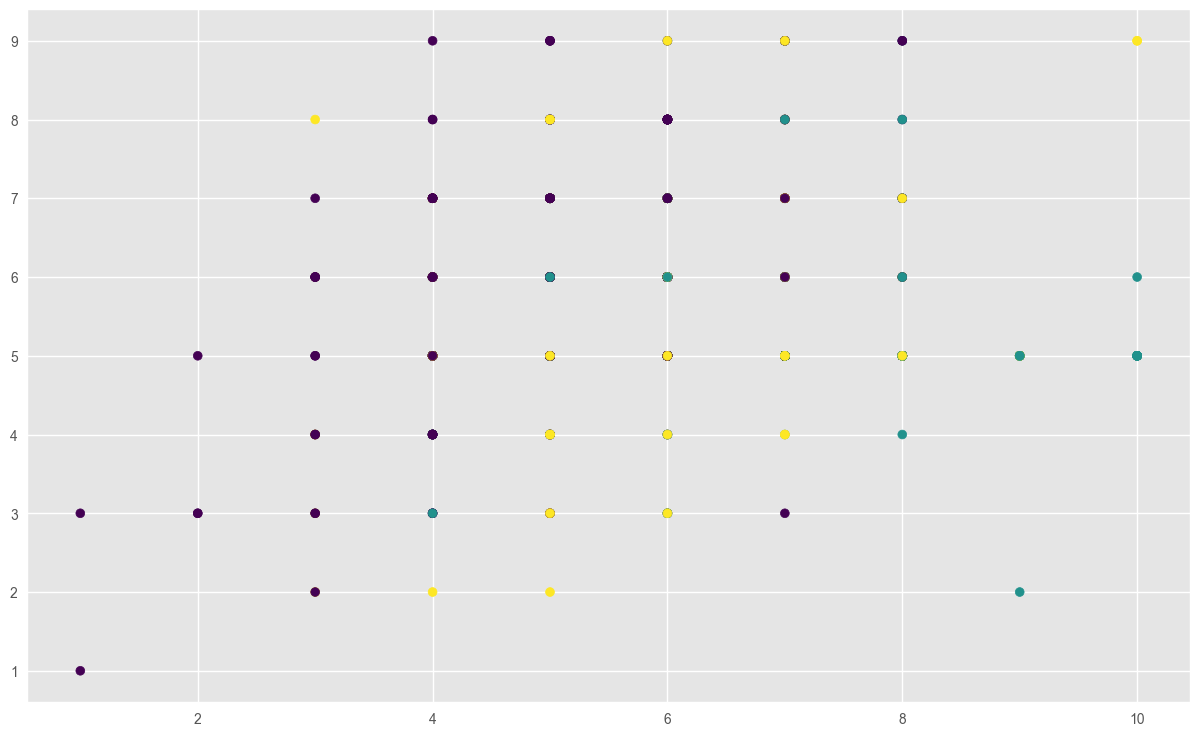

In [44]:
#pip install fuzzy-c-means
import numpy as np
from fcmeans import FCM # is inside the fuzzy-c-means installation
from matplotlib import pyplot as plt

fcm = FCM(n_clusters=3)
fcm.fit(numeric_means)

# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(numeric_means)

# plot result
# f, axes = plt.subplots(1, 2, figsize=(11,5))
# axes[0].scatter(X[:,0], X[:,1], alpha=.1)
# axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
# axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
# plt.show()

plt.scatter(numeric_means[:, 0], numeric_means[:, 1], c=fcm_labels, s=40,cmap="viridis");